In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
path = ('./datasets/diabetes.csv')

df_colesterol = pd.read_csv(path, index_col=False)
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,997.000000,997.000000,997.000000,1000.000000
mean,500.500000,49.206620,76.496690,174.889669,199.453260
std,288.819436,17.476704,21.439132,8.844703,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.700000,167.000000,166.345000
50%,500.500000,49.000000,75.500000,175.000000,199.455000
75%,750.250000,65.000000,90.200000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [81]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [82]:
df_colesterol['Nível de Atividade'].value_counts()

Nível de Atividade
Baixo       426
Moderado    298
Alto        272
Name: count, dtype: int64

In [83]:
df_colesterol.drop(columns='Id', inplace=True)

In [84]:
df_colesterol

,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,O,Não,Alto,51.0,47.7,170.0,128.03
997,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [85]:
#df_colesterol.rename(columns={ 'Grupo Sanguíneo': 'grupo_sanguineo', 'Fumante': 'fumante', 'Nível de Atividade': 'nivel_de_atividade', 'Idade':'idade', 'Peso':'peso', 'Altura': 'altura', 'Colesterol':'colesterol'}, inplace=True)

In [86]:
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [87]:
df_colesterol

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,O,Não,Alto,51.0,47.7,170.0,128.03
997,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [88]:
df_colesterol_eda = df_colesterol.copy()
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [89]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [90]:
df_colesterol_eda.isna().sum()

grupo_sanguineo     4
fumante             3
nivel_atividade     4
idade               3
peso                3
altura              3
nivel_colesterol    0
dtype: int64

In [91]:
# Coletar Modas das variáveis

moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade.mode()


In [92]:
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [93]:
#Imputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [94]:
df_colesterol_eda.isna().sum()

grupo_sanguineo     0
fumante             0
nivel_atividade     0
idade               0
peso                0
altura              0
nivel_colesterol    0
dtype: int64

In [97]:
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)


In [101]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='nivel_colesterol'>

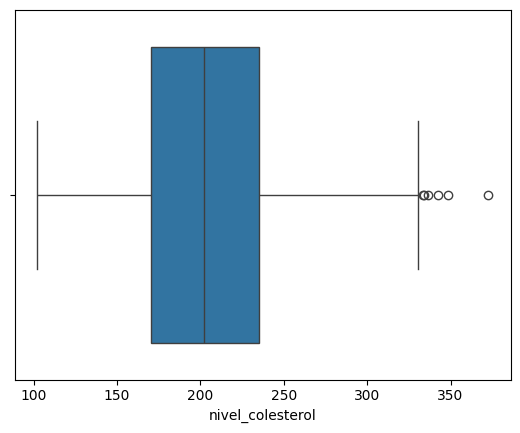

In [116]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

In [111]:
df_colesterol_eda[df_colesterol_eda.peso < 40]

np.int64(37)

In [113]:
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index, axis=0, inplace=True)